<h1>Creating a climate model for Weather Data</h1>

<h3>Importing all the required libraries</h3>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor


<h3>Importing the data set and using linear interpolation to reduce null values</h3>
<h3>Reading the first few lines of the data</h3>

In [2]:
df = pd.read_csv('climate-daily.csv', low_memory=False )

df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

df.head()

x          y STATION_NAME  CLIMATE_IDENTIFIER                 ID  \
0 -81.151111  43.033056     LONDON A             6144473  6144473.2012.3.20   
1 -81.151111  43.033056     LONDON A             6144473  6144473.2012.3.21   
2 -81.151111  43.033056     LONDON A             6144473  6144473.2012.3.22   
3 -81.151111  43.033056     LONDON A             6144473  6144473.2012.3.23   
4 -81.151111  43.033056     LONDON A             6144473  6144473.2012.3.24   

            LOCAL_DATE PROVINCE_CODE  LOCAL_YEAR  LOCAL_MONTH  LOCAL_DAY  ...  \
0  2012-03-20 00:00:00            ON        2012            3         20  ...   
1  2012-03-21 00:00:00            ON        2012            3         21  ...   
2  2012-03-22 00:00:00            ON        2012            3         22  ...   
3  2012-03-23 00:00:00            ON        2012            3         23  ...   
4  2012-03-24 00:00:00            ON        2012            3         24  ...   

   SPEED_MAX_GUST SPEED_MAX_GUST_FLAG  COOLING_DEGREE_DAYS  \
0             0.0                 NaN                 0.00   
1            50.0                 NaN                 0.90   
2             0.0                 NaN                 1.10   
3            61.0                 NaN                 0.55   
4            35.0                 NaN                 0.00   

  COOLING_DEGREE_DAYS_FLAG  HEATING_DEGREE_DAYS HEATING_DEGREE_DAYS_FLAG  \
0                      NaN                 0.10                      NaN   
1                      NaN                 0.00                      NaN   
2                      NaN                 0.00                      NaN   
3                        M                 4.25                        M   
4                      NaN                 8.50                      NaN   

   MIN_REL_HUMIDITY MIN_REL_HUMIDITY_FLAG  MAX_REL_HUMIDITY  \
0               NaN                   NaN               NaN   
1               NaN                   NaN               NaN   
2               NaN                   NaN               NaN   
3               NaN                   NaN               NaN   
4               NaN                   NaN               NaN   

  MAX_REL_HUMIDITY_FLAG  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 36 columns]

<h3>Describing the data set </h3>

In [3]:
df.describe()

x             y  CLIMATE_IDENTIFIER   LOCAL_YEAR  \
count  3.011000e+03  3.011000e+03              3011.0  3011.000000   
mean  -8.115111e+01  4.303306e+01           6144473.0  2015.878446   
std    2.117769e-12  4.974625e-14                 0.0     2.412971   
min   -8.115111e+01  4.303306e+01           6144473.0  2012.000000   
25%   -8.115111e+01  4.303306e+01           6144473.0  2014.000000   
50%   -8.115111e+01  4.303306e+01           6144473.0  2016.000000   
75%   -8.115111e+01  4.303306e+01           6144473.0  2018.000000   
max   -8.115111e+01  4.303306e+01           6144473.0  2020.000000   

       LOCAL_MONTH    LOCAL_DAY  MEAN_TEMPERATURE  MIN_TEMPERATURE  \
count  3011.000000  3011.000000       3011.000000      3011.000000   
mean      6.466290    15.762537          8.182398         3.092544   
std       3.407795     8.810995         10.675195        10.005230   
min       1.000000     1.000000        -24.500000       -30.500000   
25%       4.000000     8.000000          0.100000        -3.500000   
50%       6.000000    16.000000          8.400000         3.000000   
75%       9.000000    23.000000         17.600000        11.300000   
max      12.000000    31.000000         28.500000        23.200000   

       MAX_TEMPERATURE  TOTAL_PRECIPITATION  TOTAL_RAIN  TOTAL_SNOW  \
count      3011.000000                  0.0         0.0         0.0   
mean         13.243872                  NaN         NaN         NaN   
std          11.658458                  NaN         NaN         NaN   
min         -19.000000                  NaN         NaN         NaN   
25%           3.500000                  NaN         NaN         NaN   
50%          14.200000                  NaN         NaN         NaN   
75%          23.800000                  NaN         NaN         NaN   
max          34.800000                  NaN         NaN         NaN   

       SNOW_ON_GROUND  SNOW_ON_GROUND_FLAG  DIRECTION_MAX_GUST  \
count             0.0                  0.0         3011.000000   
mean              NaN                  NaN            0.727001   
std               NaN                  NaN            4.229056   
min               NaN                  NaN            0.000000   
25%               NaN                  NaN            0.000000   
50%               NaN                  NaN            0.000000   
75%               NaN                  NaN            0.000000   
max               NaN                  NaN           36.000000   

       SPEED_MAX_GUST  COOLING_DEGREE_DAYS  HEATING_DEGREE_DAYS  \
count     3011.000000          3011.000000          3011.000000   
mean         1.539356             0.761392            10.578994   
std          8.294979             1.727998             9.739640   
min          0.000000             0.000000             0.000000   
25%          0.000000             0.000000             0.400000   
50%          0.000000             0.000000             9.600000   
75%          0.000000             0.000000            17.900000   
max         96.000000            10.500000            42.500000   

       MIN_REL_HUMIDITY  MAX_REL_HUMIDITY  
count        611.000000        611.000000  
mean          59.324059         92.936170  
std           14.869974          6.725656  
min           20.000000         67.000000  
25%           49.000000         89.000000  
50%           59.000000         95.000000  
75%           69.000000         98.000000  
max           95.000000        100.000000

<h3>Finding the features that have null values </h3>

In [4]:
df.isnull().sum()

x                              0
y                              0
STATION_NAME                   0
CLIMATE_IDENTIFIER             0
ID                             0
LOCAL_DATE                     0
PROVINCE_CODE                  0
LOCAL_YEAR                     0
LOCAL_MONTH                    0
LOCAL_DAY                      0
MEAN_TEMPERATURE               0
MEAN_TEMPERATURE_FLAG       2987
MIN_TEMPERATURE                0
MIN_TEMPERATURE_FLAG        2987
MAX_TEMPERATURE                0
MAX_TEMPERATURE_FLAG        2987
TOTAL_PRECIPITATION         3011
TOTAL_PRECIPITATION_FLAG       0
TOTAL_RAIN                  3011
TOTAL_RAIN_FLAG                0
TOTAL_SNOW                  3011
TOTAL_SNOW_FLAG                0
SNOW_ON_GROUND              3011
SNOW_ON_GROUND_FLAG         3011
DIRECTION_MAX_GUST             0
DIRECTION_MAX_GUST_FLAG     2393
SPEED_MAX_GUST                 0
SPEED_MAX_GUST_FLAG         2393
COOLING_DEGREE_DAYS            0
COOLING_DEGREE_DAYS_FLAG    2987
HEATING_DE

<h3>Using unit circle mapping from temporal values</h3>

In [8]:
year = df['LOCAL_YEAR']
month = df['LOCAL_MONTH']
day = df['LOCAL_DAY']

circMap = pd.concat([month, day], axis=1,)

print ('Unique values of month:',circMap.LOCAL_MONTH.unique())
print('Unique values of day: ', circMap.LOCAL_DAY.unique())



Unique values of month: [ 3  4  5  6  7  8  9 10 11 12  1  2]
Unique values of day:  [20 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19]


In [9]:
circMap['mnth_sin'] = np.sin((circMap.LOCAL_MONTH)*(2.*np.pi/12))
circMap['mnth_cos'] = np.cos((circMap.LOCAL_MONTH)*(2.*np.pi/12))
circMap['day_sin'] = np.sin((circMap.LOCAL_DAY)*(2.*np.pi/31))
circMap['day_cos'] = np.cos((circMap.LOCAL_DAY)*(2.*np.pi/31))


In [12]:

X = pd.concat([year, circMap['mnth_sin'], circMap['mnth_cos'], circMap['day_sin'], circMap['day_cos']], axis=1)
y = df['MEAN_TEMPERATURE']

print(X.shape)
print(y.shape)

(3011, 5)
(3011,)


<h3>Splitting the data into a testing and a training set</h3>

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

<h3>Using the Random Forest Regresser model to fit the data</h3>

In [14]:
X_train1, Y_train1 = X_train, Y_train
tree_model = RandomForestRegressor()
tree_model.fit(X_train1, Y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<h3>Testing the models</h3>

In [15]:
y_pred1 = tree_model.predict(X_test)

<h3>Comparing the actual outputs vs. the predicted outputs</h3>

In [16]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred1})
print(df.head(10))
plot1 = df[:10]

      Actual  Predicted
2065     2.2      6.183
553     11.9     12.264
2594     7.5      7.814
2487    -9.2     -6.110
1872    13.0     13.070
489     14.8     22.014
1840     8.3     11.919
2779    -6.6     -3.444
1841    14.2      9.885
118     24.3     21.554


<h3>Plotting the actual outputs vs. the predicted outputs</h3>

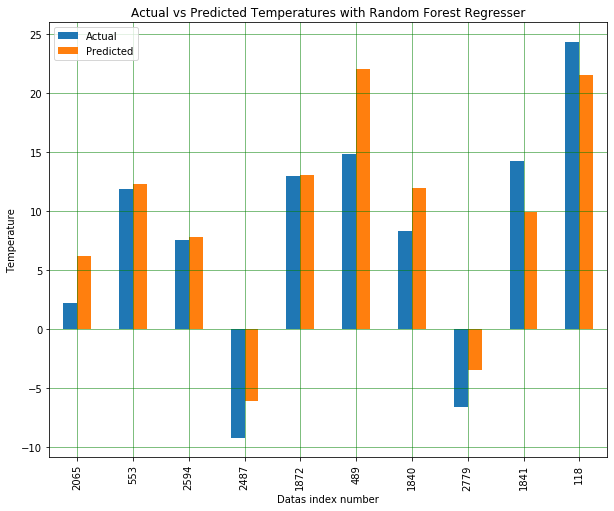

In [17]:
plot1.plot(kind='bar',figsize=(10,8))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs Predicted Temperatures with Random Forest Regresser')
plt.ylabel('Temperature')
plt.xlabel('Datas index number')

plt.show()

<h3>Determining the intercept value, the root mean square error and the r squared value to validate our model</h3>

In [18]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred1))      
r2_value = r2_score(Y_test, y_pred1)                     

print('Random Forest Regressor')
print("Root Mean Square Error \n", rmsd) #the lower the value the better the fit
print("R^2 Value: \n", r2_value) #the closer to 1 the better the fit

Random Forest Regressor
Root Mean Square Error 
 3.7572087365617333
R^2 Value: 
 0.8829501344957303


<h3>Predicting the weather today</h3>

In [22]:
#print(X)

def predict(year, month, day):
    
    monthSin = np.sin((month-1)*(2.*np.pi/12))
    monthCos = np.cos((month-1)*(2.*np.pi/12))
    daySin = np.sin((day-1)*(2.*np.pi/31))
    dayCos = np.cos((day-1)*(2.*np.pi/31))
   
    predictdf = pd.DataFrame({'Year': year, 'Month Sin': monthSin, 'Month Cos': monthCos, 'Day Sin': daySin, 'Day Cos':dayCos}, index=[0])
    return predictdf
    
    
pred = predict(2020, 6, 24)
print(pred)

   Year  Month Sin  Month Cos   Day Sin   Day Cos
0  2020        0.5  -0.866025 -0.998717 -0.050649


In [23]:
y_predDay = tree_model.predict(pred)

In [24]:
print('The predict temperature for June 24, 2020 at 11am is: ',y_predDay, ' degrees celsius')

The predict temperature for June 24, 2020 at 11am is:  [18.614]  degrees celsius
